# Семинар 2. Новые признаки. Базовая визуализация

#### <i>Малкова Ксения, Преподаватель ФКН НИУ ВШЭ, kemalkova@hse.ru</i>*

*почты все еще нет

## Считываем данные

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/aaparshina/FCI_22-23_data_analysis/main/data/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Описание признаков**:
- **`PassengerId`** - id пассажира;
- **`Survived`** выжил пассажирил (1) или нет (0);
- **`Pclass`** - класс пассажира;
- **`Name`** - имя пассажира;
- **`Sex`** - пол пассажира;
- **`Age`** - возраст пассажира;
- **`SibSp`** - количество родственников (братьев, сестер, супругов) пассажира на борту;
- **`Parch`** - количество родственников (родителей / детей) пассажира на борту;
- **`Ticket`** - номер билета;
- **`Fare`** - тариф (стоимость билета);
- **`Cabin`** - номер кабины;
- **`Embarked`** - порт, в котором пассажир сел на борт (C - Cherbourg, S - Southampton, Q - Queenstown)

## 1. Создание новых признаков

Иногда нужно создать новый признак из уже существующих, например, нам интересно, сколько всего родственников путешествовало с каждым пассажиром - просто сложим столбцы `SibSp` и `Parch` и поместим сумму в новый столбец `FamilySize`.

In [5]:
data['FamilySize'] = data['SibSp'] + data['Parch']
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Анонимные функции (`lambda` функции)

Это же можно реализовать короче с помощью анонимных функций.

Это особый вид функций, которые объявляются с помощью ключевого слова `lambda` вместо `def`:

```python
    lambda x: инструкция
```


Применить функцию можно с помощью метода `.apply()`

Создадим столбец `Alone` на основе признака `FamilySize`, определяет ехал человек в одиночку (**True**) или с родствениками (**False**):

In [6]:
data['Alone'] = data['FamilySize'].apply(lambda x: True if x == 0 else False)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True


Так как `x == 0` - выражение, которое возвращает **True**, если условие выполняется, и **False**, если условие не выполняется, то можно *сделать более краткую запись* - она аналогична предыдущей:

In [7]:
data['Alone'] = data['FamilySize'].apply(lambda x: x == 0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True


### Функции

Можно использовать обычную функцию, которую мы создаем при помощи `def`:

```python
def name(x):
  if условие 1:
     return результат
  elif условие 2:
     return результат
  ...
  else:
     return результат
```

Создаем функцию `clss`, которая перекодирует признак `Pclass` следущим образом:
- *1 класс*  - **High**
- *2 класс* - **Middle**
- *3 класс* - **Low**

In [8]:
def clss(x):
  if x == 1:
    return 'High'
  elif x == 2:
   return 'Middle'
  else:
    return 'Low'

Теперь создаем новую колонку `Pclass_coded`, куда запишем результат работы нашей функции класс `clss`:

In [9]:
data['Pclass_coded'] = data['Pclass'].apply(clss)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,Pclass_coded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,False,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,False,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,True,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,False,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,True,Low


## 2. Частотная таблица `.value_counts()`

### 2.1 Основные моменты `.value_counts()`
- Строится, как правило, по **категориальным** данным
- Показывает, сколько раз каждая уникальная категория встретилась в признаке
- Метод возвращает **тип данных** под названием `Series object`
- В `Series object` всего **два столбца**:
    1. Первый столбец - индексы (`.index`). В методе `.value_counts()` - индексы категорий.
    2. Второй столбец - значения (`.values`). В методе `.value_counts()` - сколько раз данная категория встретилась в признаке.

- **Синтаксис:**
    ```python
        датафрейм['столбец'].value_counts()
    ```

In [13]:
# Смотрим на то, что возвращает .value_counts() - два столбца
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [12]:
# Тип возвращаемых данных
type(data['Pclass'].value_counts())

pandas.core.series.Series

In [ ]:
# Глянем на индексы - это уникальные категории в признаке 'Pclass'
data['Pclass'].value_counts().index

Index([3, 1, 2], dtype='int64', name='Pclass')

In [14]:
# Поглядим на значения - это частоты соответствующих категорий в признаке 'Pclass'
data['Pclass'].value_counts().values

array([491, 216, 184])

### 2.2 Сортировка в `.value_counts()` ⭐️

1) **По встречаемости категорий**

  - *От самой частой до самой редкой* - `.value_counts()` автоматически сортирует категории от самой частой до самой редкой.
    ```python
      датафрейм['столбец'].value_counts()
    ```
  - *От самой редкой до самой частой* - после применения `value_counts()` воспользуйтесь `.sort_values()`.
    ```python
      датафрейм['столбец'].value_counts().sort_values()
    ```

2) **По категориям** (индексам, первый столбец) - можем воспользоваться `.sort_index()`
  - *По возрастанию категорий* (A-Z, от 0 до N)
    ```python
      датафрейм['столбец'].value_counts().sort_index()
    ```
  - *По убыванию категорий* (Z-A, от N до 0)
    ```python
      датафрейм['столбец'].value_counts().sort_index(ascending = False)
    ```

In [16]:
# 1.1 Сортируем по встречаемости категорий: от частой (491) до редкой (184)
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [17]:
# 1.2 Сортируем по встречаемости категорий: от редкой (184) до частой (491)
data['Pclass'].value_counts().sort_values()

Pclass
2    184
1    216
3    491
Name: count, dtype: int64

In [18]:
# 2.1 Сортируем по возрастанию категорий (1 -> 3)
data['Pclass'].value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

In [19]:
# 2.2 Сортируем по убыванию категорий (3 -> 1)
data['Pclass'].value_counts().sort_index(ascending = False)

Pclass
3    491
2    184
1    216
Name: count, dtype: int64

### 2.3 Приведение частотной таблицы к долям

Данные в частотной таблице можно привести к долям с помощью параметра `normalize = True`:
```python
    датафрейм['столбец'].value_counts(normalize = True)
```

In [20]:
data['Pclass'].value_counts(normalize = True)

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

##  3. Базовая визуализация `.plot()`

### 3.1 Визуализация категориальных данных

#### 3.1.1 Линейная диаграмма

- Используется для **категориальных** данных
- Используется, чтобы показать динамику в течении времени (хотя у нас нет временных меток)
- **Синтаксис:**
    ```python
        датафрейм['столбец'].value_counts().plot()
    ```

<Axes: xlabel='Embarked'>

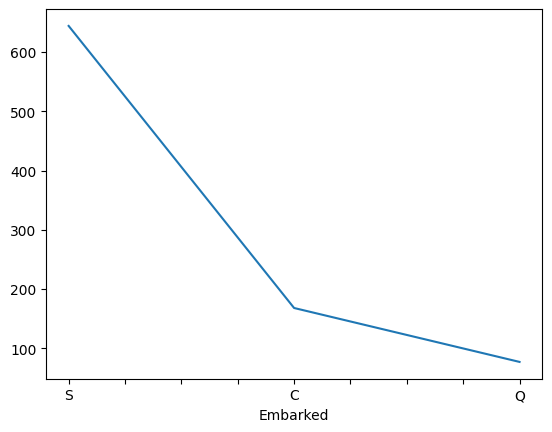

In [21]:
data["Embarked"].value_counts().plot()

#### 3.1.2 Столбчатая диаграмма

- Используется для **категориальных** данных
- **Синтаксис:**
    ```python
        датафрейм['столбец'].value_counts().plot(kin = 'bar')
    ```

<Axes: xlabel='Pclass'>

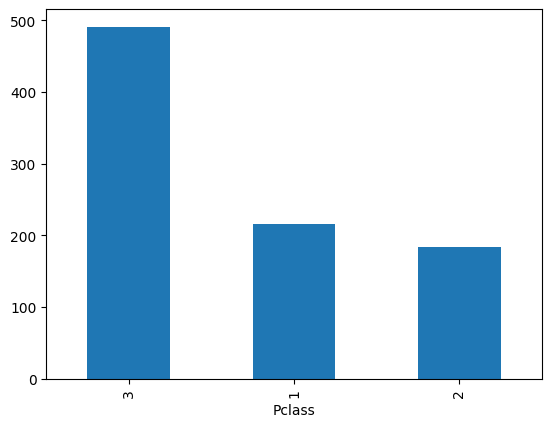

In [22]:
data["Pclass"].value_counts().plot(kind = 'bar')

<Axes: xlabel='Pclass'>

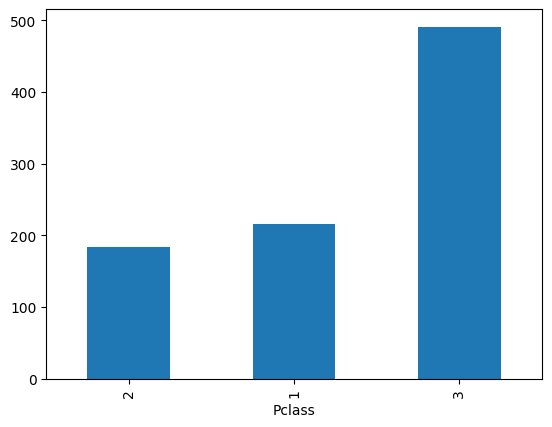

In [23]:
data["Pclass"].value_counts().sort_values().plot(kind = 'bar')

<Axes: xlabel='Pclass'>

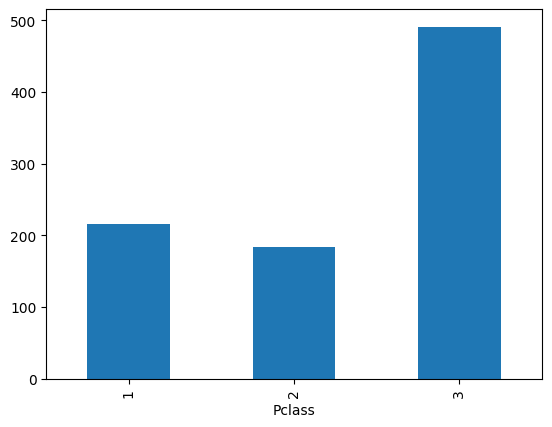

In [24]:
data["Pclass"].value_counts().sort_index().plot(kind = 'bar')

<Axes: xlabel='Pclass'>

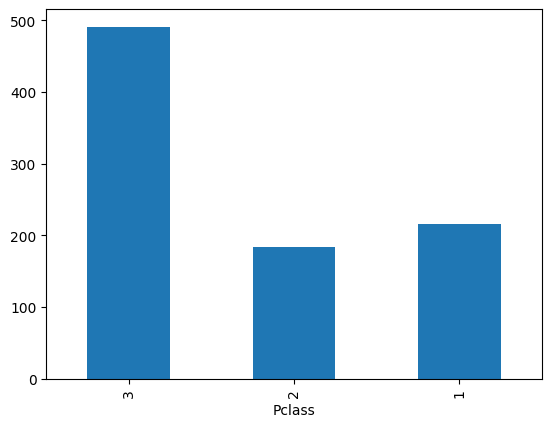

In [25]:
data["Pclass"].value_counts().sort_index(ascending = False).plot(kind = 'bar')

#### 3.1.3 Круговая диаграмма

- Используется для **категориальных** данных
- **Синтаксис:**
    ```python
        датафрейм['столбец'].value_counts().plot(kin = 'pie')
    ```


<Axes: ylabel='count'>

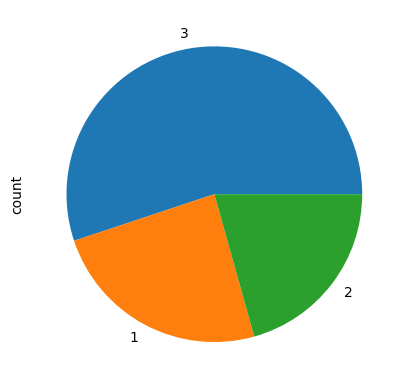

In [26]:
data["Pclass"].value_counts().plot(kind = 'pie')

### 3.2 Визуализация числовых данных

#### 3.2.1 Гистограмма распределения

- Используется для **числовых** данных
- По **горизонтальной** оси - *значение признака*, по **вертикальной** - *частота* (количество вхождений, "встречаемость")
- Используется чтобы показать распределение данных
- **Синтаксис:**
    ```python
        датафрейм['столбец'].plot(kind = 'hist')
    ```

<Axes: ylabel='Frequency'>

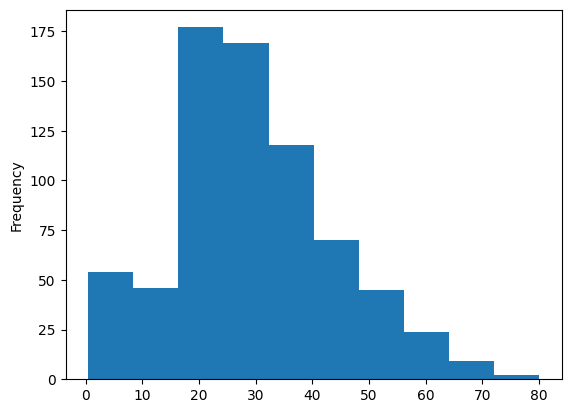

In [27]:
data['Age'].plot(kind='hist')

❗️По **вертикальной** оси также может быть отображена *вероятность* "встретить" данное значение признака. В таких случаях график также называется **гистограммой**, но имя вертикальной оси сменяется на **плотность вероятности**

<Axes: >

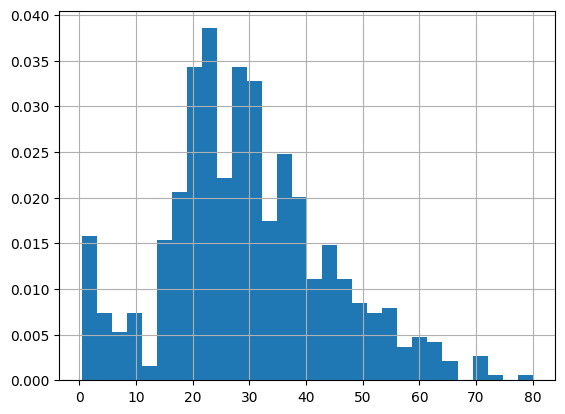

In [43]:
data['Age'].hist(density=True, bins=30)

#### 3.2.2 Ящик с усами

- Используется для **числовых** данных
- По **горизонтальной** оси *значение признака*
- Что значит эта коробка разберем на семинаре с описательными статистиками
- **Синтаксис:**
    ```python
        датафрейм['столбец'].plot(kind = 'box', vert = False)
    ```

<Axes: >

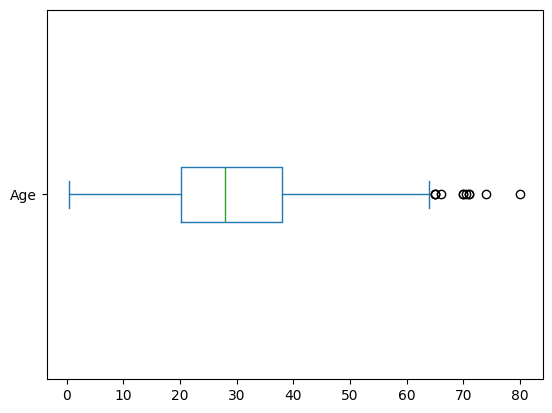

In [44]:
data['Age'].plot(kind='box', vert = False)

<Axes: >

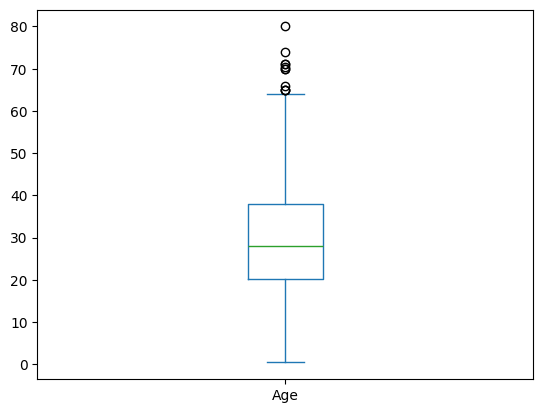

In [45]:
data['Age'].plot(kind='box', vert = True)

#### 3.2.3 Диаграмма рассеяния

- Используется для **числовых** данных
- Используется, чтобы показать зависимость между числовыми признаками
- **Синтаксис:**
    ```python
        датафрейм.plot('столбец X', 'столбец Y', kind = 'scatter')
    ```

<Axes: xlabel='Age', ylabel='Fare'>

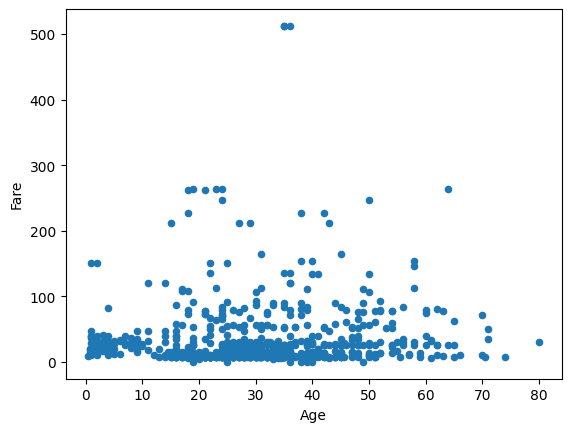

In [46]:
data.plot('Age', 'Fare', kind = 'scatter')

## **A2**

Соотнесите тип визуализации и признак.

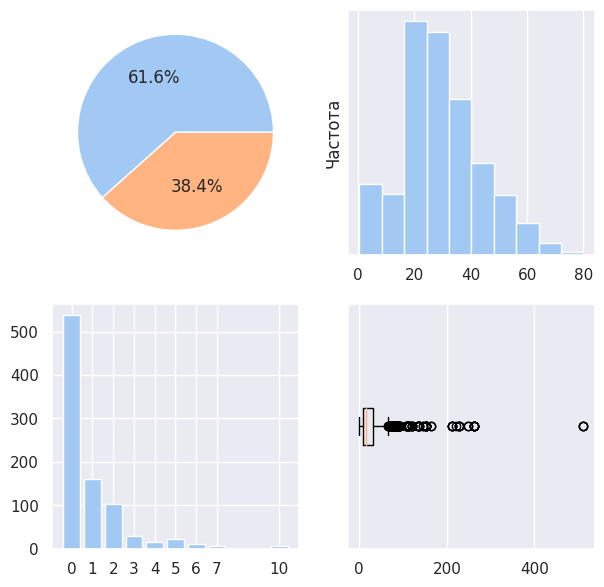

- Количество спутников у каждого пассажира на Титанике
- Распределение выживших и погибших на Титанике
- Распределение цены билета на Титаник
- Распределение возраста пассажиров Титаника